In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# data generators 
train_dir = '/Users/jomus/Code/summer/summerepo/Compvision/data/train'
validation_dir = '/Users/jomus/Code/summer/summerepo/Compvision/data/validation'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary',
        shuffle=False) # THIS LINE IMPORTANT


Found 464 images belonging to 2 classes.
Found 116 images belonging to 2 classes.


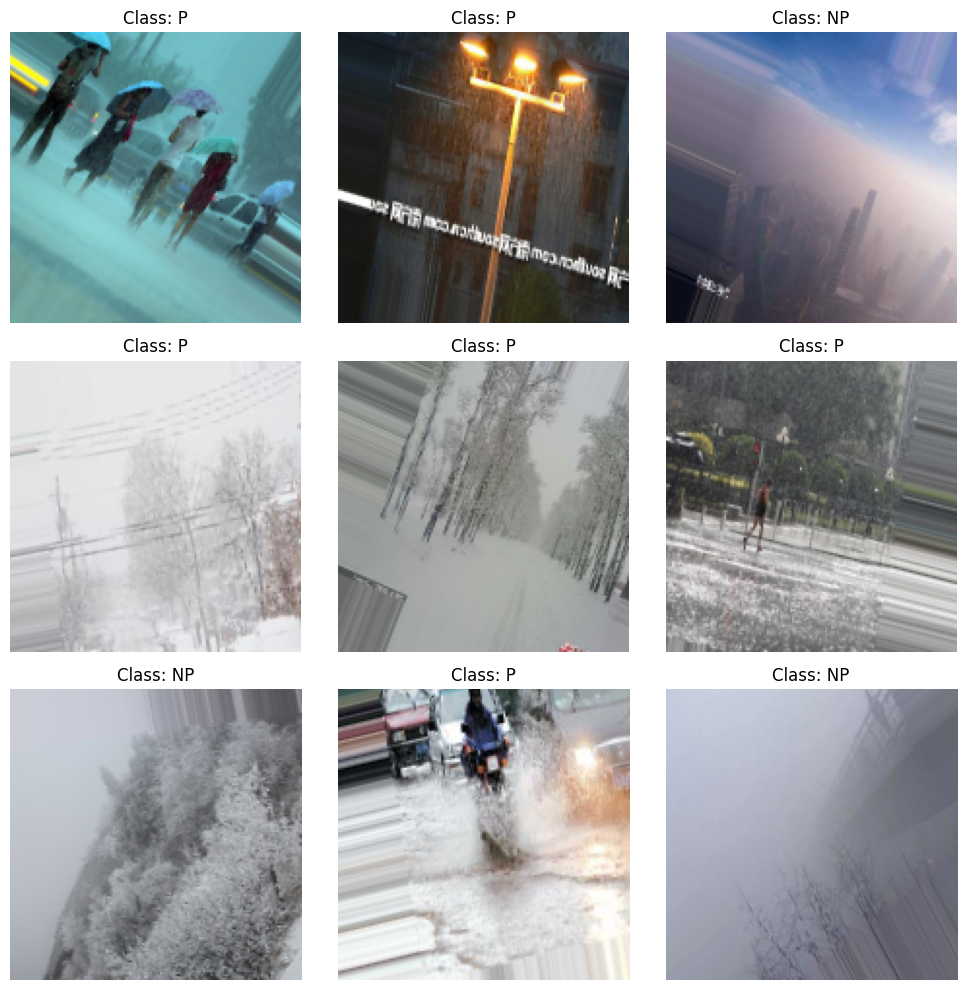

In [2]:

# get augmented images , get mapping from class index to class name, and plotting the first 9
augmented_images, augmented_labels = next(train_generator)

class_names = {v: k for k, v in train_generator.class_indices.items()}

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    class_name = class_names[int(augmented_labels[i])]
    plt.title(f"Class: {class_name}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [3]:
# defining and compiling FEASIBILITY
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
conv_base.trainable = False  # Keep the base frozen

model = models.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])

# only training for a few
print(" Starting Feasibility Training ")
history = model.fit(
      train_generator,
      steps_per_epoch=29,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=6)



2025-07-14 18:31:50.870624: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-07-14 18:31:50.870773: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-07-14 18:31:50.870812: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
I0000 00:00:1752535910.871538 18150571 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1752535910.871990 18150571 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


 Starting Feasibility Training 


/Users/jomus/Code/tf_env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


2025-07-14 18:32:01.180056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


24/29 ━━━━━━━━━━━━━━━━━━━━ 4s 841ms/step - accuracy: 0.6345 - loss: 0.6669

/Users/jomus/Code/tf_env/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


29/29 ━━━━━━━━━━━━━━━━━━━━ 49s 825ms/step - accuracy: 0.6437 - loss: 0.6565 - val_accuracy: 0.8448 - val_loss: 0.4858
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 463ms/step - accuracy: 0.7980 - loss: 0.4875 - val_accuracy: 0.8621 - val_loss: 0.4068
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 775ms/step - accuracy: 0.8283 - loss: 0.4051 - val_accuracy: 0.8707 - val_loss: 0.3669
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 600ms/step - accuracy: 0.8709 - loss: 0.3460 - val_accuracy: 0.8966 - val_loss: 0.3266
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 530ms/step - accuracy: 0.8417 - loss: 0.3714 - val_accuracy: 0.9052 - val_loss: 0.3056
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 427ms/step - accuracy: 0.8740 - loss: 0.3352 - val_accuracy: 0.9138 - val_loss: 0.2896
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 404ms/step - accuracy: 0.8990 - loss: 0.2667 - val_accuracy: 0.9052 - val_loss: 0.2810
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 414ms/step - accuracy: 0.9027 - loss: 0.2732 - val_accuracy: 0.905


Plotting Feasibility Results 


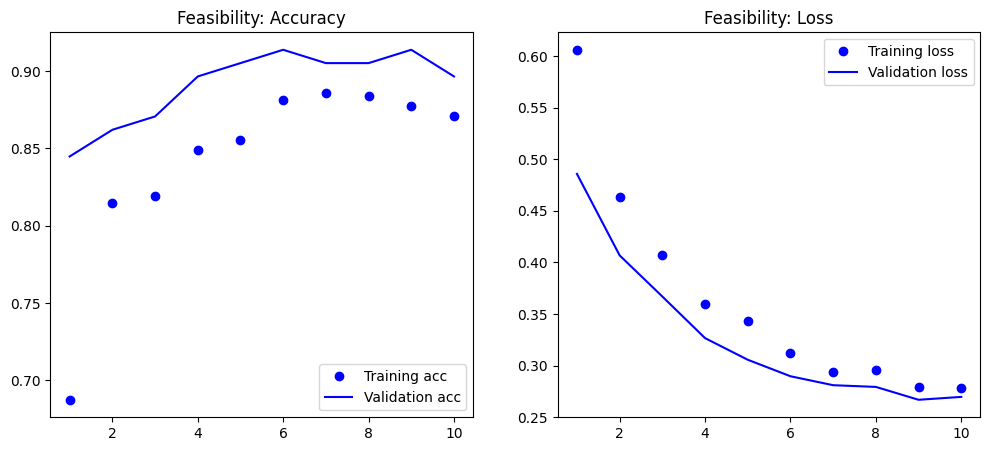

In [4]:
print("\nPlotting Feasibility Results ")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Feasibility: Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Feasibility: Loss')
plt.legend()

plt.show()

In [5]:
from sklearn.metrics import classification_report, f1_score

print(" Evaluating Feasibility Model")

# just to be safe
validation_generator.reset()

# Make predictions
predictions = model.predict(validation_generator, steps=validation_generator.n // validation_generator.batch_size + 1)
predicted_classes = (predictions > 0.5).astype(int).flatten()
true_classes = validation_generator.classes

# metrics
print(f"Feasibility Model F1 Score: {f1_score(true_classes, predicted_classes):.4f}")
print("\nFeasibility Model Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=['No Precipitation', 'Precipitation']))

 Evaluating Feasibility Model
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 517ms/step
Feasibility Model F1 Score: 0.8983

Feasibility Model Classification Report:
                  precision    recall  f1-score   support

No Precipitation       0.91      0.88      0.89        58
   Precipitation       0.88      0.91      0.90        58

        accuracy                           0.90       116
       macro avg       0.90      0.90      0.90       116
    weighted avg       0.90      0.90      0.90       116

